# **Analyzing StartUp Investments**

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/startup-investments-crunchbase/investments_VC.csv


### Reading Data 

In [2]:
df = pd.read_csv('/kaggle/input/startup-investments-crunchbase/investments_VC.csv',encoding = 'unicode_escape')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

In [4]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [5]:
#Correcting columns name
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [6]:
df.rename(columns={' market ': 'market', ' funding_total_usd ': 'funding_total_usd'}, inplace = True)


In [7]:
df.dropna(inplace = True)


In [8]:
#Checking if are duplicated rows
df.duplicated().sum()

0

### Exploring Data

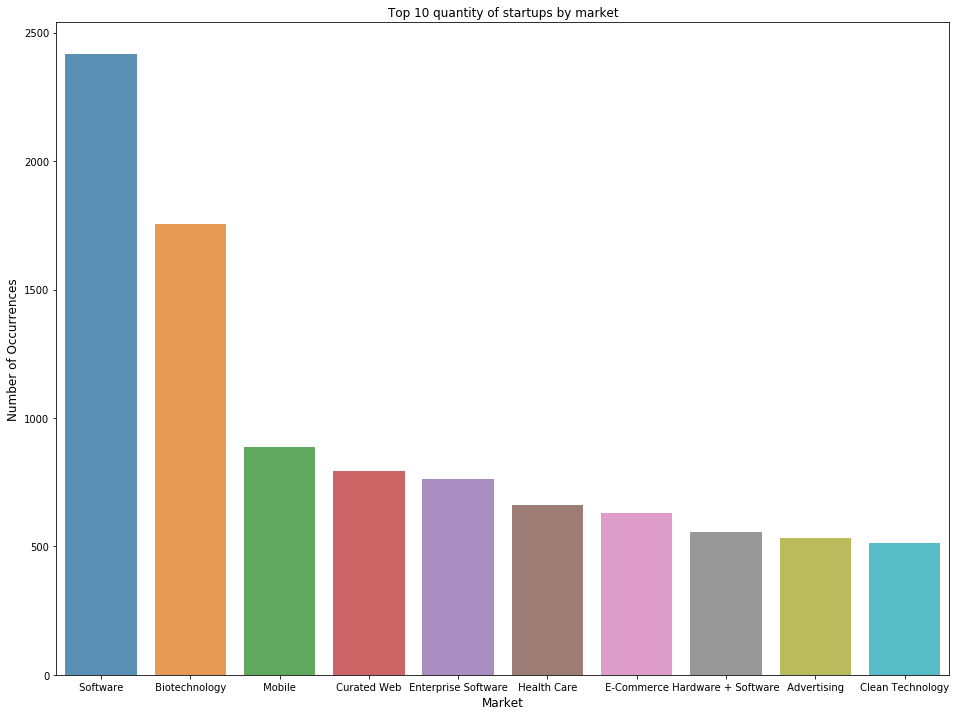

In [9]:
#Market
market_count  = df['market'].value_counts()
market_count = market_count[:10,]
plt.figure(figsize=(16,12))
sns.barplot(market_count.index, market_count.values, alpha=0.8)
plt.title('Top 10 quantity of startups by market')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Market', fontsize=12)
plt.show()

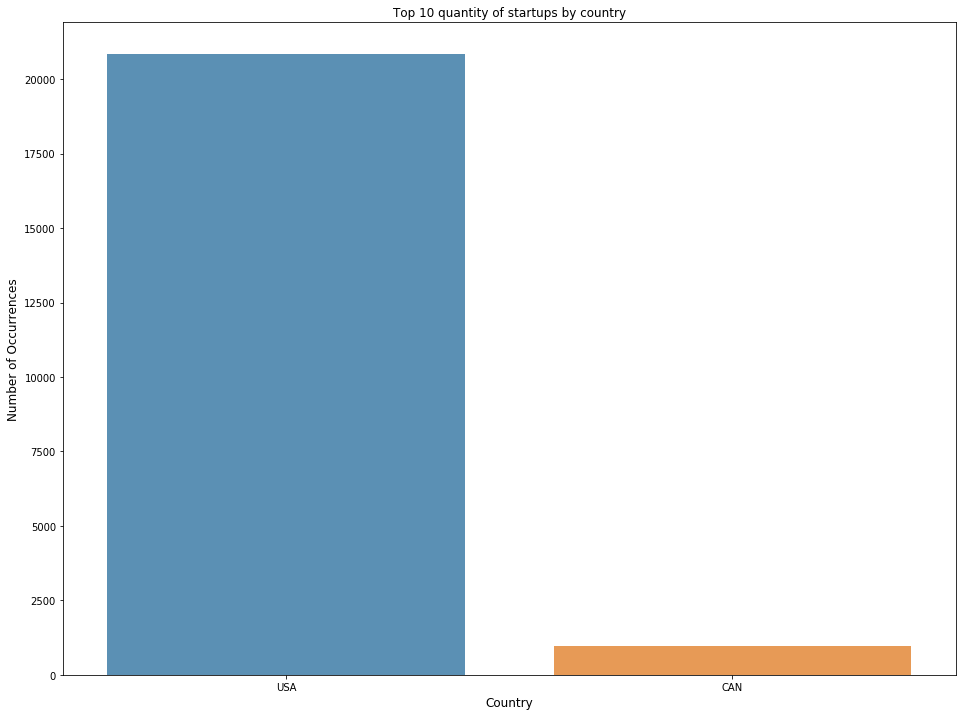

In [10]:
#Country
country_count  = df['country_code'].value_counts()
country_count = country_count[:10,]
plt.figure(figsize=(16,12))
sns.barplot(country_count.index, country_count.values, alpha=0.8)
plt.title('Top 10 quantity of startups by country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

As we can see, this dataset is about American's as Canadian's StartUps, with majority of American ones

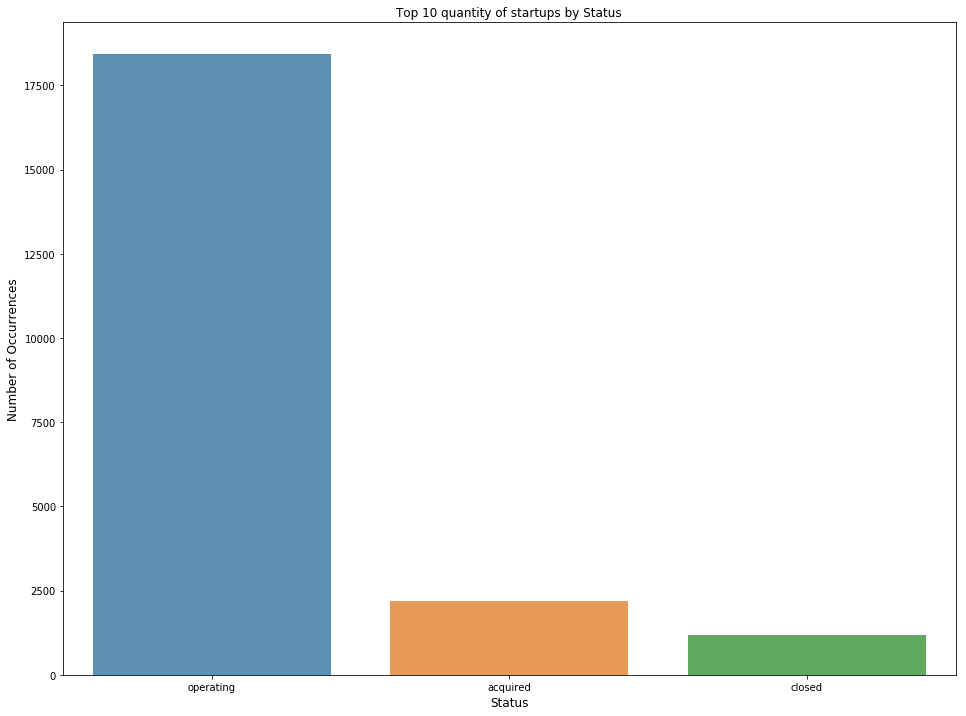

In [11]:
#Status
status_count  = df['status'].value_counts()
status_count = status_count[:10,]
plt.figure(figsize=(16,12))
sns.barplot(status_count.index, status_count.values, alpha=0.8)
plt.title('Top 10 quantity of startups by Status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.show()

### Trying understand and pre processing the column 'funding_total_usd'

In [12]:
df.funding_total_usd.replace(' -   ',0, inplace = True)


In [13]:
df.funding_total_usd

0            17,50,000 
8                     0
12                    0
13           17,50,000 
16           20,50,000 
              ...      
49425      1,30,00,000 
49426     86,65,50,786 
49427      2,50,00,000 
49429      3,42,75,015 
49437      4,50,00,000 
Name: funding_total_usd, Length: 21840, dtype: object

In [14]:
df.funding_total_usd.head().replace

<bound method Series.replace of 0      17,50,000 
8               0
12              0
13     17,50,000 
16     20,50,000 
Name: funding_total_usd, dtype: object>

#### Waiting for dataset owner answer about that column

## Profile about which all 3 status

In [15]:
operating = df[df.status == 'operating']
acquired = df[df.status == 'acquired']
closed = df[df.status == 'closed']

In [16]:
operating_count  = operating['market'].value_counts(normalize=True)
operating_count = operating_count[:10,]

acquired_count  = acquired['market'].value_counts(normalize=True)
acquired_count = acquired_count[:10,]

closed_count  = closed['market'].value_counts(normalize=True)
closed_count = closed_count[:10,]

print('Operating')
print(operating_count)
print('-------------------------------------------')
print('Acquired')
print(acquired_count)
print('-------------------------------------------')
print('Closed')
print(closed_count)

Operating
 Software                0.109280
 Biotechnology           0.087489
 Mobile                  0.037402
 Health Care             0.032632
 Enterprise Software     0.032361
 Curated Web             0.030030
 E-Commerce              0.029326
 Hardware + Software     0.026561
 Health and Wellness     0.025640
 Clean Technology        0.024501
Name: market, dtype: float64
-------------------------------------------
Acquired
 Software                0.126249
 Enterprise Software     0.062216
 Mobile                  0.057221
 Curated Web             0.054950
 Advertising             0.042688
 Biotechnology           0.037693
 Games                   0.028610
 Security                0.026794
 Semiconductors          0.022707
 Web Hosting             0.020890
Name: market, dtype: float64
-------------------------------------------
Closed
 Software                0.105042
 Curated Web             0.100000
 Mobile                  0.060504
 Games                   0.048739
 Biotechnolo

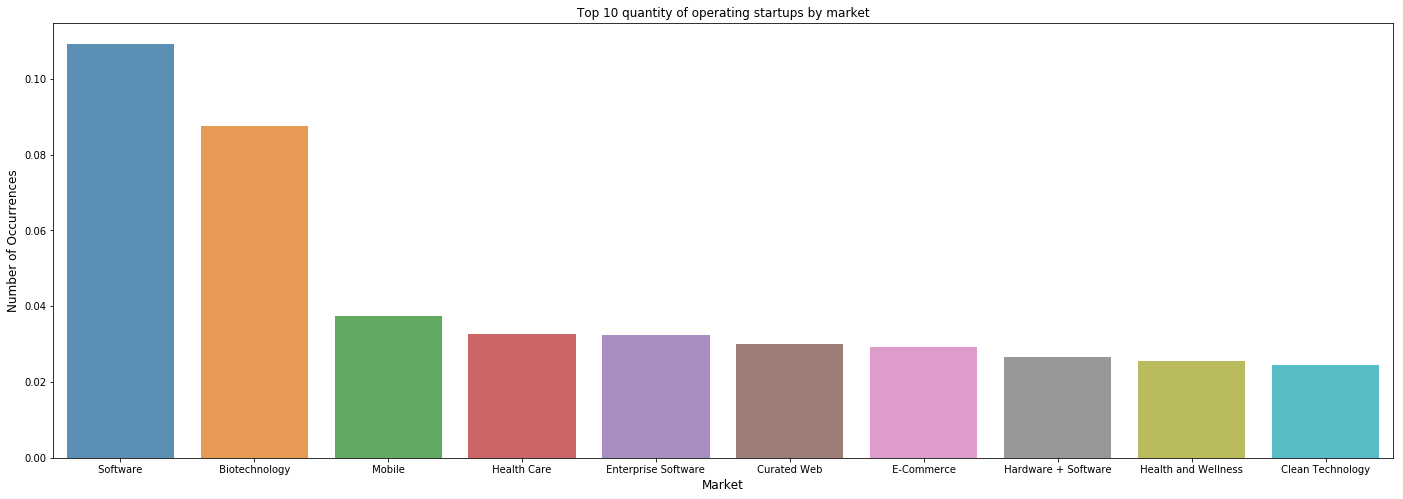

In [17]:
#Market
operating_count  = operating['market'].value_counts(normalize=True)
operating_count = operating_count[:10,]
plt.figure(figsize=(24,8))
sns.barplot(operating_count.index, operating_count.values, alpha=0.8)
plt.title('Top 10 quantity of operating startups by market')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Market', fontsize=12)
plt.show()

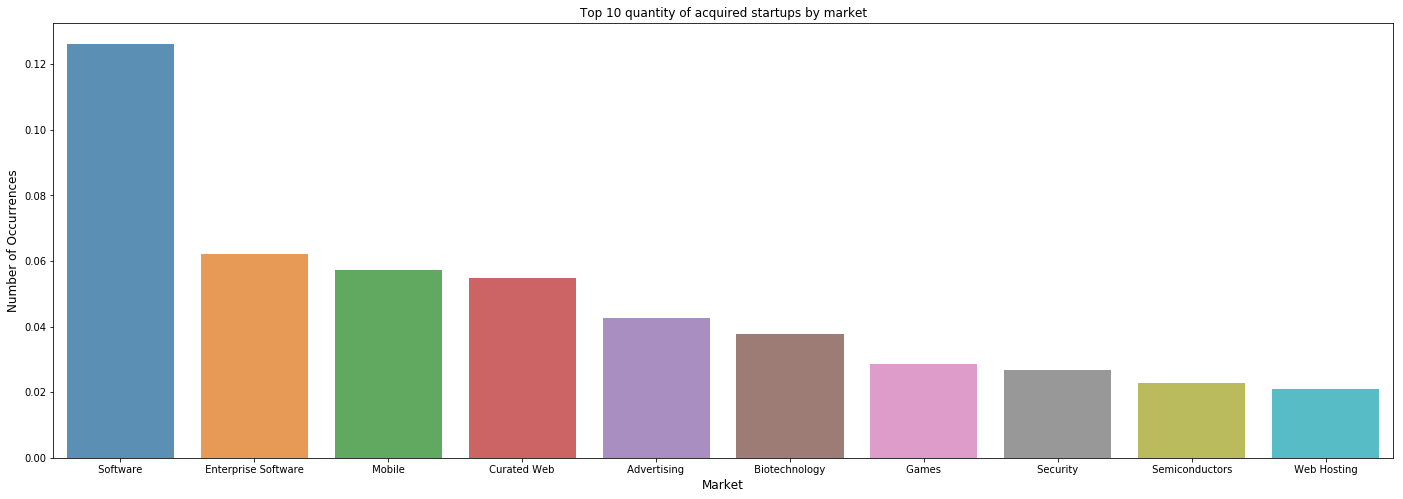

In [18]:
#Market
acquired_count  = acquired['market'].value_counts(normalize=True)
acquired_count = acquired_count[:10,]
plt.figure(figsize=(24,8))
sns.barplot(acquired_count.index, acquired_count.values, alpha=0.8)
plt.title('Top 10 quantity of acquired startups by market')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Market', fontsize=12)
plt.show()

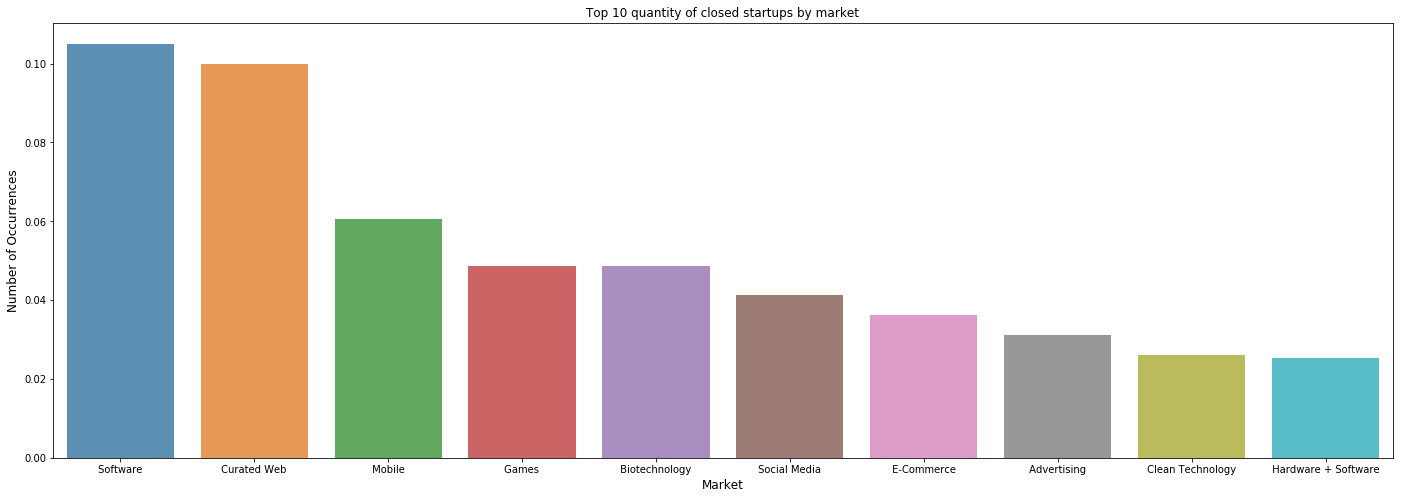

In [19]:
#Market
closed_count  = closed['market'].value_counts(normalize=True)
closed_count = closed_count[:10,]
plt.figure(figsize=(24,8))
sns.barplot(closed_count.index, closed_count.values, alpha=0.8)
plt.title('Top 10 quantity of closed startups by market')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Market', fontsize=12)
plt.show()